# Análise de Startups

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data.csv')

df.head()

,Unnamed: 0,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
0,0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
3,3,Klarna,$45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."
4,4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [3]:
# Vendo o shape
df.shape

(936, 8)

In [4]:
df.rename(columns={
    'Unnamed: 0' : 'Id',
    'Company' : 'Empresa',
    'Valuation ($B)' : 'Valor ($)',
    'Date Joined' : 'Data de Adesão',
    'Country' : 'Pais',
    'City' : 'Cidade',
    'Industry': 'Setor',
    'Select Investors': 'Investidores',
    }          
    ,inplace=True)

In [5]:
df.head()

,Id,Empresa,Valor ($),Data de Adesão,Pais,Cidade,Setor,Investidores
0,0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
3,3,Klarna,$45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."
4,4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [6]:
# Vendo os tipos de informação das variaveis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              936 non-null    int64 
 1   Empresa         936 non-null    object
 2   Valor ($)       936 non-null    object
 3   Data de Adesão  936 non-null    object
 4   Pais            936 non-null    object
 5   Cidade          921 non-null    object
 6   Setor           936 non-null    object
 7   Investidores    935 non-null    object
dtypes: int64(1), object(7)
memory usage: 58.6+ KB


In [7]:
# Vendo campos nulos
df.isnull().sum()

Id                 0
Empresa            0
Valor ($)          0
Data de Adesão     0
Pais               0
Cidade            15
Setor              0
Investidores       1
dtype: int64

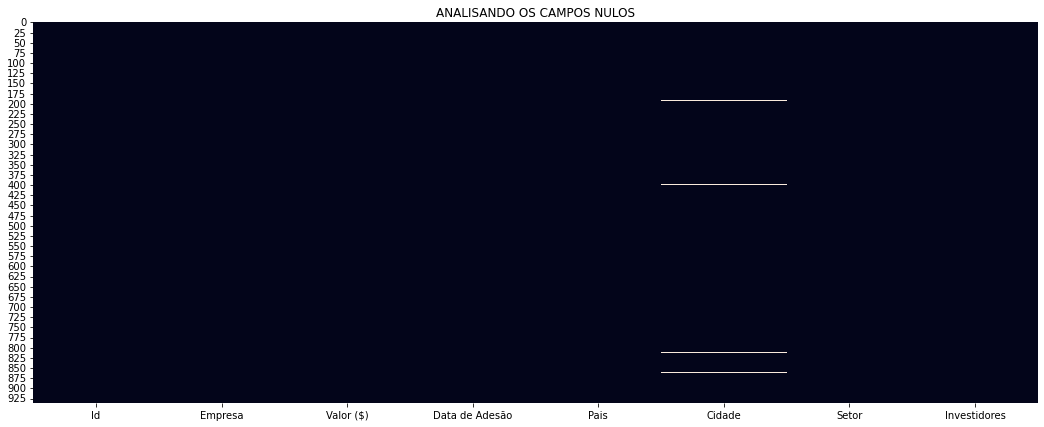

In [8]:
plt.figure(figsize=(18,7))
plt.title("ANALISANDO OS CAMPOS NULOS")
sns.heatmap(df.isnull(), cbar=False);

In [9]:
df.nunique()

Id                936
Empresa           935
Valor ($)         192
Data de Adesão    589
Pais               47
Cidade            239
Setor              17
Investidores      920
dtype: int64

In [10]:
df['Setor'].unique()

array(['Artificial intelligence', 'Other', 'Fintech',
       'Internet software & services',
       'Supply chain, logistics, & delivery',
       'Data management & analytics', 'Edtech',
       'E-commerce & direct-to-consumer', 'Hardware', 'Health',
       'Consumer & retail', 'Auto & transportation', 'Finttech',
       'Cybersecurity', 'Mobile & telecommunications', 'Travel',
       'Artificial Intelligence'], dtype=object)

In [11]:
df['Setor'].value_counts()

Fintech                                190
Internet software & services           167
E-commerce & direct-to-consumer        102
Artificial intelligence                 69
Health                                  63
Supply chain, logistics, & delivery     51
Other                                   51
Cybersecurity                           41
Mobile & telecommunications             37
Data management & analytics             36
Hardware                                32
Auto & transportation                   29
Edtech                                  27
Consumer & retail                       23
Travel                                  13
Artificial Intelligence                  4
Finttech                                 1
Name: Setor, dtype: int64

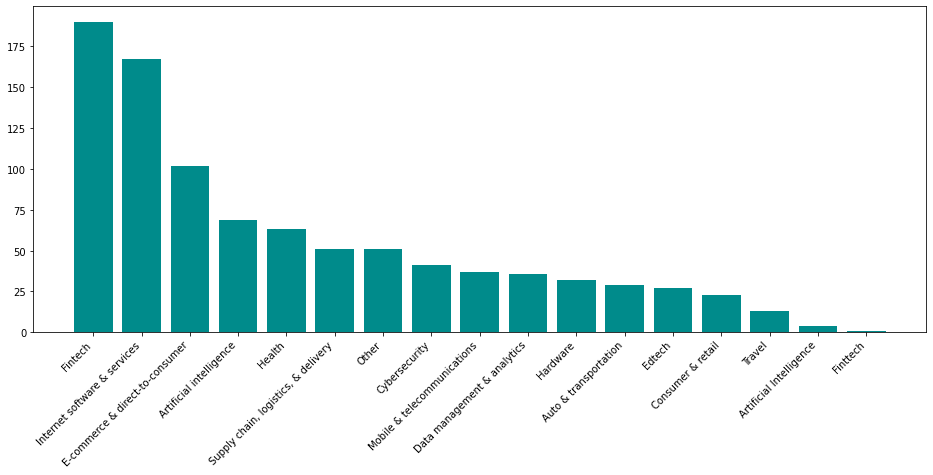

In [12]:
plt.figure(figsize=(16,6))
plt.bar(df['Setor'].value_counts().index, df['Setor'].value_counts(), color = '#008B8B')
plt.xticks(rotation = 45, ha='right' );

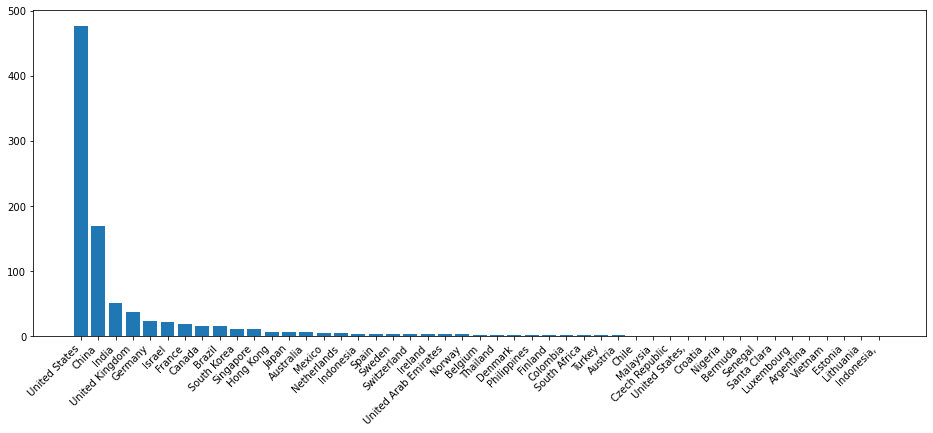

In [13]:
# Países ranqueados
plt.figure(figsize=(16, 6))
plt.bar(df['Pais'].value_counts().index, # height -> Index de valores
        df['Pais'].value_counts()) # valores em sí

plt.xticks(rotation = 45, # Rotação
           ha='right' # Altura
          );

In [14]:
# Criando uma variável com os percentuais

a = round(df['Pais'].value_counts(normalize=True) * 100, 1)

Text(0.5, 1.0, 'Top 5 Paises')

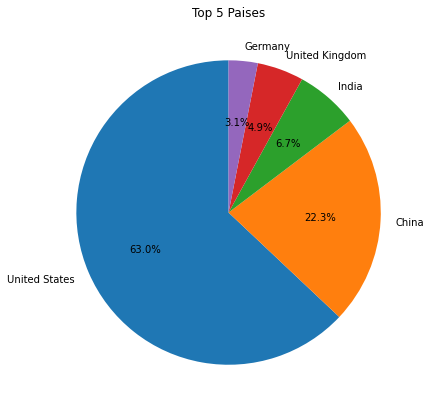

In [15]:
plt.figure(figsize=(17,7))
plt.pie(a.head(5),
        labels=a.index[0:5], 
        shadow=False, 
        startangle=90,
        autopct='%1.1f%%',);
plt.title("Top 5 Paises")

In [16]:
# Transformando em data
df['Data de Adesão'] = pd.to_datetime(df['Data de Adesão'])
df['Data de Adesão'].head(5)

0   2017-04-07
1   2012-12-01
2   2014-01-23
3   2011-12-12
4   2018-01-08
Name: Data de Adesão, dtype: datetime64[ns]

In [17]:
df['Mes'] = pd.DatetimeIndex(df['Data de Adesão']).month
df['Ano'] = pd.DatetimeIndex(df['Data de Adesão']).year
df.head().T

,0,1,2,3,4
Id,0,1,2,3,4
Empresa,Bytedance,SpaceX,Stripe,Klarna,Canva
Valor ($),$140,$100.3,$95,$45.6,$40
Data de Adesão,2017-04-07 00:00:00,2012-12-01 00:00:00,2014-01-23 00:00:00,2011-12-12 00:00:00,2018-01-08 00:00:00
Pais,China,United States,United States,Sweden,Australia
Cidade,Beijing,Hawthorne,San Francisco,Stockholm,Surry Hills
Setor,Artificial intelligence,Other,Fintech,Fintech,Internet software & services
Investidores,"Sequoia Capital China, SIG Asia Investments, S...","Founders Fund, Draper Fisher Jurvetson, Rothen...","Khosla Ventures, LowercaseCapital, capitalG","Institutional Venture Partners, Sequoia Capita...","Sequoia Capital China, Blackbird Ventures, Mat..."
Mes,4,12,1,12,1
Ano,2017,2012,2014,2011,2018


In [19]:
# Transformando os valores em numéricos
df['Valor ($)'] = pd.to_numeric(df['Valor ($)'].apply(lambda x: x.replace("$", '')))
df.head()

,Id,Empresa,Valor ($),Data de Adesão,Pais,Cidade,Setor,Investidores,Mes,Ano
0,0,Bytedance,140.0,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,1,SpaceX,100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,2,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
3,3,Klarna,45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",12,2011
4,4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018


In [20]:
agrupado_pais_setor = df.groupby(by=['Pais']).sum()['Valor ($)'].reset_index()
agrupado_pais_setor.head()

,Pais,Valor ($)
0,Argentina,2.45
1,Australia,50.60
2,Austria,5.81
3,Belgium,7.55
4,Bermuda,1.60


In [21]:
analise_valor = agrupado_pais_setor.sort_values('Valor ($)', ascending=False)
analise_valor.head()

,Pais,Valor ($)
44,United States,1604.03
8,China,569.48
43,United Kingdom,150.29
18,India,148.45
16,Germany,66.63


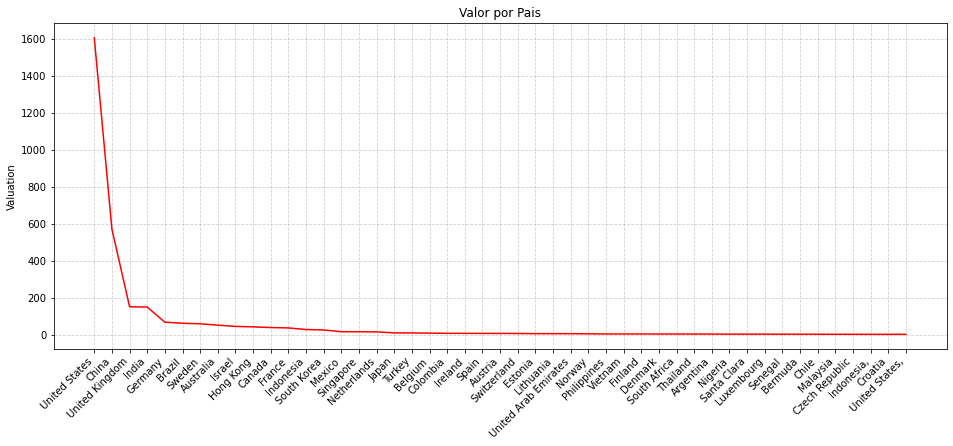

In [40]:
plt.figure(figsize=(16,6))
plt.plot(analise_valor['Pais'], analise_valor['Valor ($)'], color = 'red' )
plt.title("Valor por Pais")
plt.ylabel("Valuation")
plt.grid( linestyle='--', alpha=0.6 )
plt.xticks(rotation= 45,ha='right' );

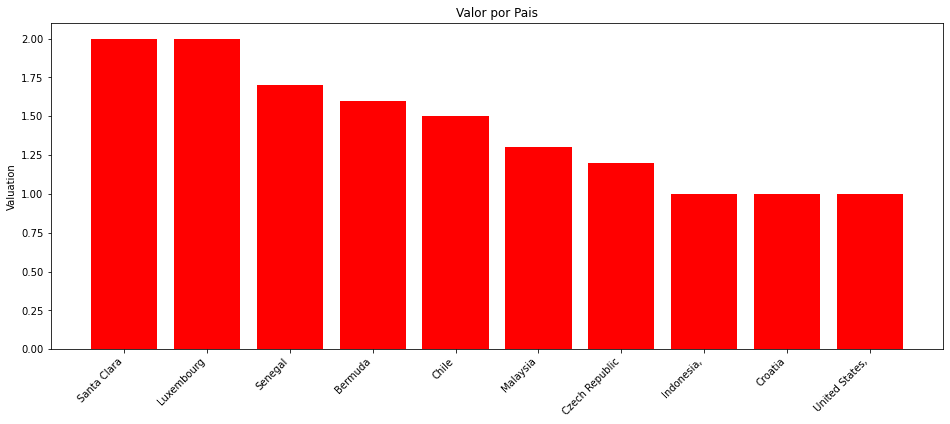

In [54]:
# Top paises com menor valuation
 
plt.figure(figsize=(16,6))
plt.bar(analise_valor['Pais'].tail(10), analise_valor['Valor ($)'].tail(10), color = 'red', linestyle = '--' )
plt.title("Valor por Pais")
plt.ylabel("Valuation")
plt.xticks(rotation= 45,ha='right' );

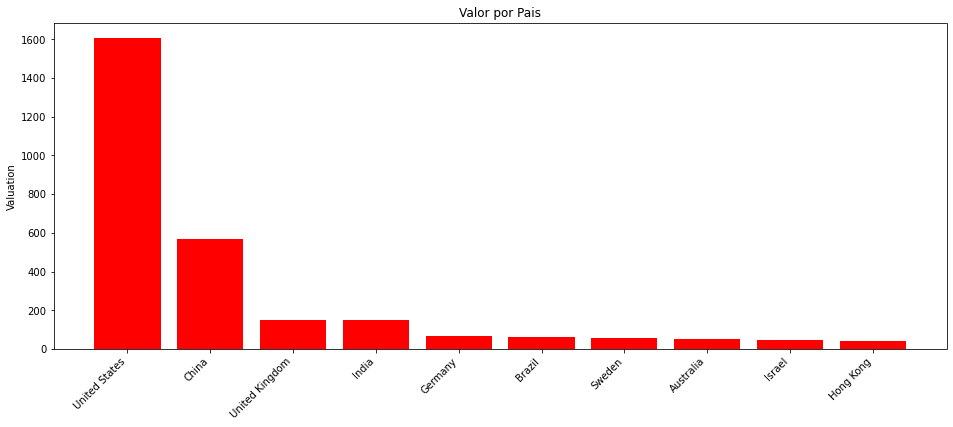

In [55]:
# Top paises com menor valuation
 
plt.figure(figsize=(16,6))
plt.bar(analise_valor['Pais'].head(10), analise_valor['Valor ($)'].head(10), color = 'red', linestyle = '--' )
plt.title("Valor por Pais")
plt.ylabel("Valuation")
plt.xticks(rotation= 45,ha='right' );

In [68]:
x = df.groupby(by=['Pais', 'Valor ($)', 'Empresa']).count()["Id"].reset_index()
brasil = x.loc[x['Pais'] == 'Brazil']

Text(0, 0.5, 'Valuation')

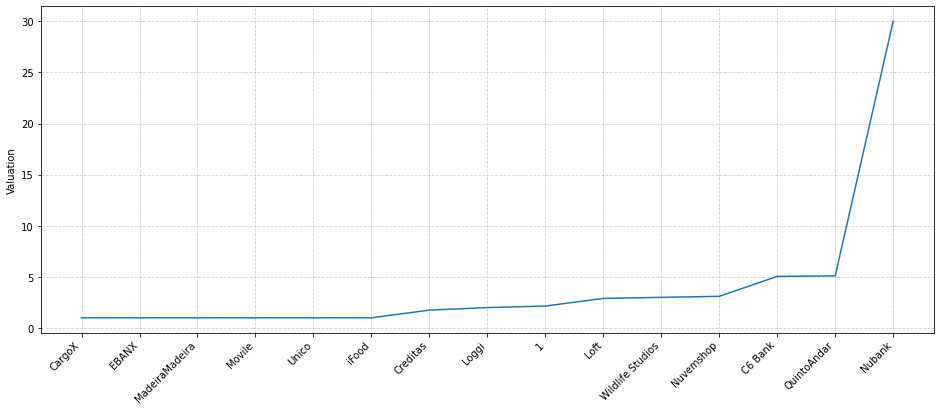

In [127]:
plt.figure(figsize=(16,6))
plt.plot(brasil['Empresa'], brasil['Valor ($)'])
plt.xticks(rotation = 45, ha = 'right');
plt.grid(linestyle='--', alpha=0.6)
plt.ylabel("Valuation")

Text(0, 0.5, 'Valuation')

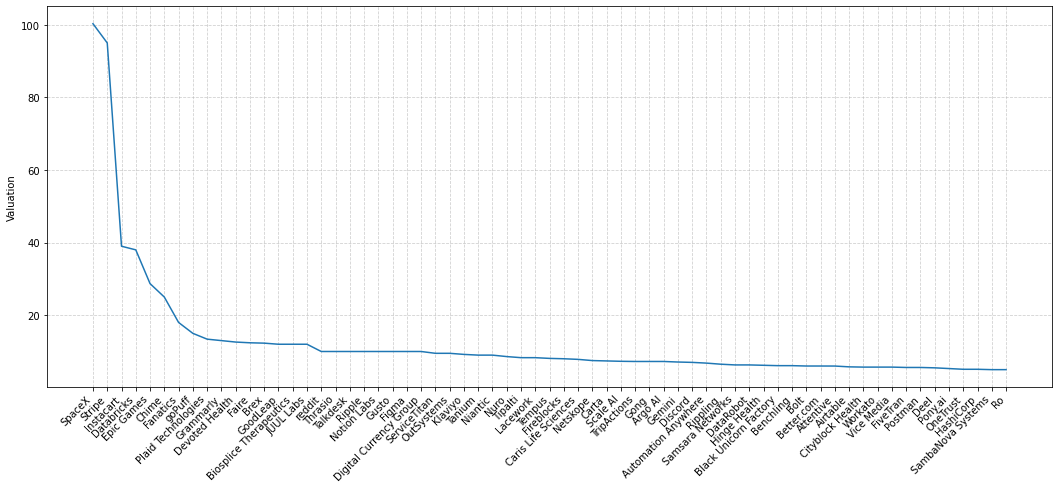

In [128]:
# Empresas Americanas com Valuation acima de 5 bi

y = df.groupby(by=['Pais', 'Valor ($)', 'Empresa']).count()["Id"].reset_index()
States = y.loc[y['Pais'] == 'United States']
States = States.sort_values('Valor ($)', ascending=False).reset_index()
States = States.loc[States['Valor ($)'] >= 5 ]

plt.figure(figsize=(18,7))
plt.plot(States['Empresa'], States['Valor ($)'])
plt.xticks(rotation = 45, ha = 'right');
plt.grid(linestyle='--', alpha=0.6)
plt.ylabel("Valuation")

Text(0, 0.5, 'Valuation')

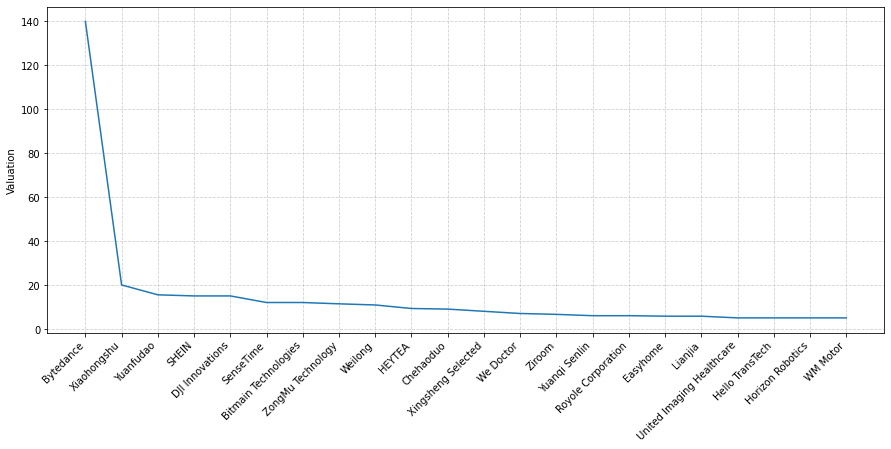

In [129]:
# Empresas Chinesas com Valuation acima de 5 bi

y = df.groupby(by=['Pais', 'Valor ($)', 'Empresa']).count()["Id"].reset_index()
China = y.loc[y['Pais'] == 'China']
China = China.sort_values('Valor ($)', ascending=False).reset_index()
China = China.loc[China['Valor ($)'] >= 5 ]

plt.figure(figsize=(15,6))
plt.plot(China['Empresa'], China['Valor ($)'])
plt.xticks(rotation = 45, ha = 'right');
plt.grid(linestyle='--', alpha=0.6)
plt.ylabel("Valuation")

Text(0, 0.5, 'Valuation')

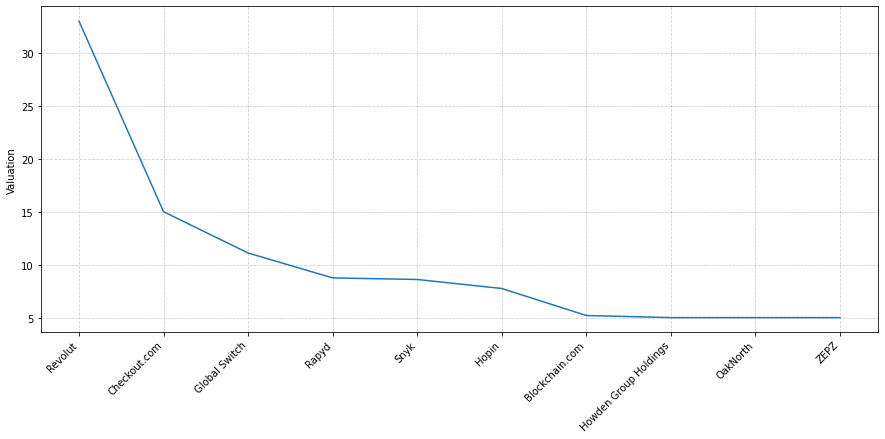

In [130]:
# Empresas do Reino Unido com Valuation acima de 5 bi

y = df.groupby(by=['Pais', 'Valor ($)', 'Empresa']).count()["Id"].reset_index()
uk = y.loc[y['Pais'] == 'United Kingdom']
uk = uk.sort_values('Valor ($)', ascending=False).reset_index()
uk = uk.loc[uk['Valor ($)'] >= 5 ]

plt.figure(figsize=(15,6))
plt.plot(uk['Empresa'], uk['Valor ($)'])
plt.xticks(rotation = 45, ha = 'right');
plt.grid(linestyle='--', alpha=0.6)
plt.ylabel("Valuation")

Text(0, 0.5, 'Valuation')

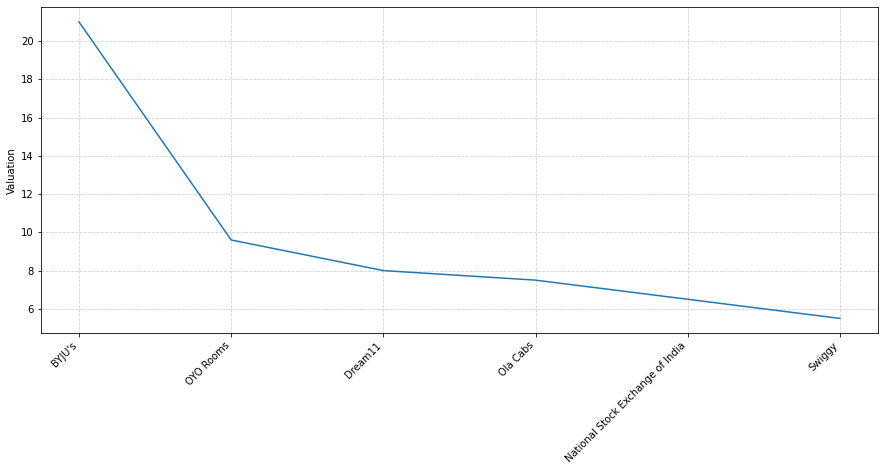

In [131]:
# Empresas Chinesas com Valuation acima de 5 bi

y = df.groupby(by=['Pais', 'Valor ($)', 'Empresa']).count()["Id"].reset_index()
india = y.loc[y['Pais'] == 'India']
india = india.sort_values('Valor ($)', ascending=False).reset_index()
india = india.loc[india['Valor ($)'] >= 5 ]

plt.figure(figsize=(15,6))
plt.plot(india['Empresa'], india['Valor ($)'])
plt.xticks(rotation = 45, ha = 'right');
plt.grid(linestyle='--', alpha=0.6)
plt.ylabel("Valuation")